In [32]:
import csv
import subprocess
import os 
import pandas as pd
import io 
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import kpss 


In [46]:
ipath = 'D:/vitaldb/first_filtered/ORC2_210907_112029.vital'
# ipath = 'D:/Dropbox/2. WORK/SNUH/vitaldb/first_filtered/ORC2_210907_112029.vital'
interval = 1
p = subprocess.Popen('vital_recs.exe -h "{}" {}'.format(ipath, interval), stdout=subprocess.PIPE)
output = p.communicate()[0].decode("utf-8")

# p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
# df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')
# for idx, val in df.iterrows():
#     print(idx)
colums = []
data = [] 
# df = pd.DataFrame()
for idx, row in enumerate(csv.reader(output.splitlines())):
    
    if idx == 0:
        colums.extend(row) 
    else:
        data.append(row)
    
df = pd.DataFrame(data, columns=colums)
df    
# colums

,Time,PLETH_SAT_O2,PLETH_HR,PLETH_PERF_REL,ECG_HR,ECG_II,PLETH,PLETH,CO2,AWP,...,PI,PAMB_MBAR,VENT_LEAK,ST_II,SPO2,BPM,NIBP_SYS,NIBP_DIA,NIBP_MEAN,PVI
0,0.000000,,,,,,,,0.000000,2.010000,...,,,,,,,,,,
1,1.000000,,,,,,,,0.000000,2.000000,...,,,,,,,,,,
2,2.000000,,,,,0.015001,62.759464,,0.000000,1.990000,...,,,,,,,,,,
3,3.000000,,,,,-0.059999,70.525032,0.000000,0.000000,2.000000,...,,,,,,,,,,
4,4.000000,100.000000,72.000000,2.000000,66.000000,0.045001,29.621490,0.000000,0.000000,2.000000,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,1610.000000,,,,,-0.004999,50.012211,0.000000,0.000000,2.000000,...,0.000000,985.000000,15.000000,,,,177.000000,116.000000,133.000000,
1611,1611.000000,,,,,-0.004999,50.012211,0.000000,0.000000,2.000000,...,0.000000,,,,,,177.000000,116.000000,133.000000,
1612,1612.000000,,,,,,,0.000000,0.000000,2.000000,...,0.000000,,,,,,177.000000,116.000000,133.000000,
1613,1613.000000,,,,,,,0.000000,0.000000,2.000000,...,0.000000,,,,,,,,,


In [47]:
df.iloc[2:1612, [0, 6]]

,Time,PLETH
2,2.000000,62.759464
3,3.000000,70.525032
4,4.000000,29.621490
5,5.000000,45.299145
6,6.000000,51.623932
...,...,...
1607,1607.000000,50.012211
1608,1608.000000,50.012211
1609,1609.000000,50.012211
1610,1610.000000,50.012211


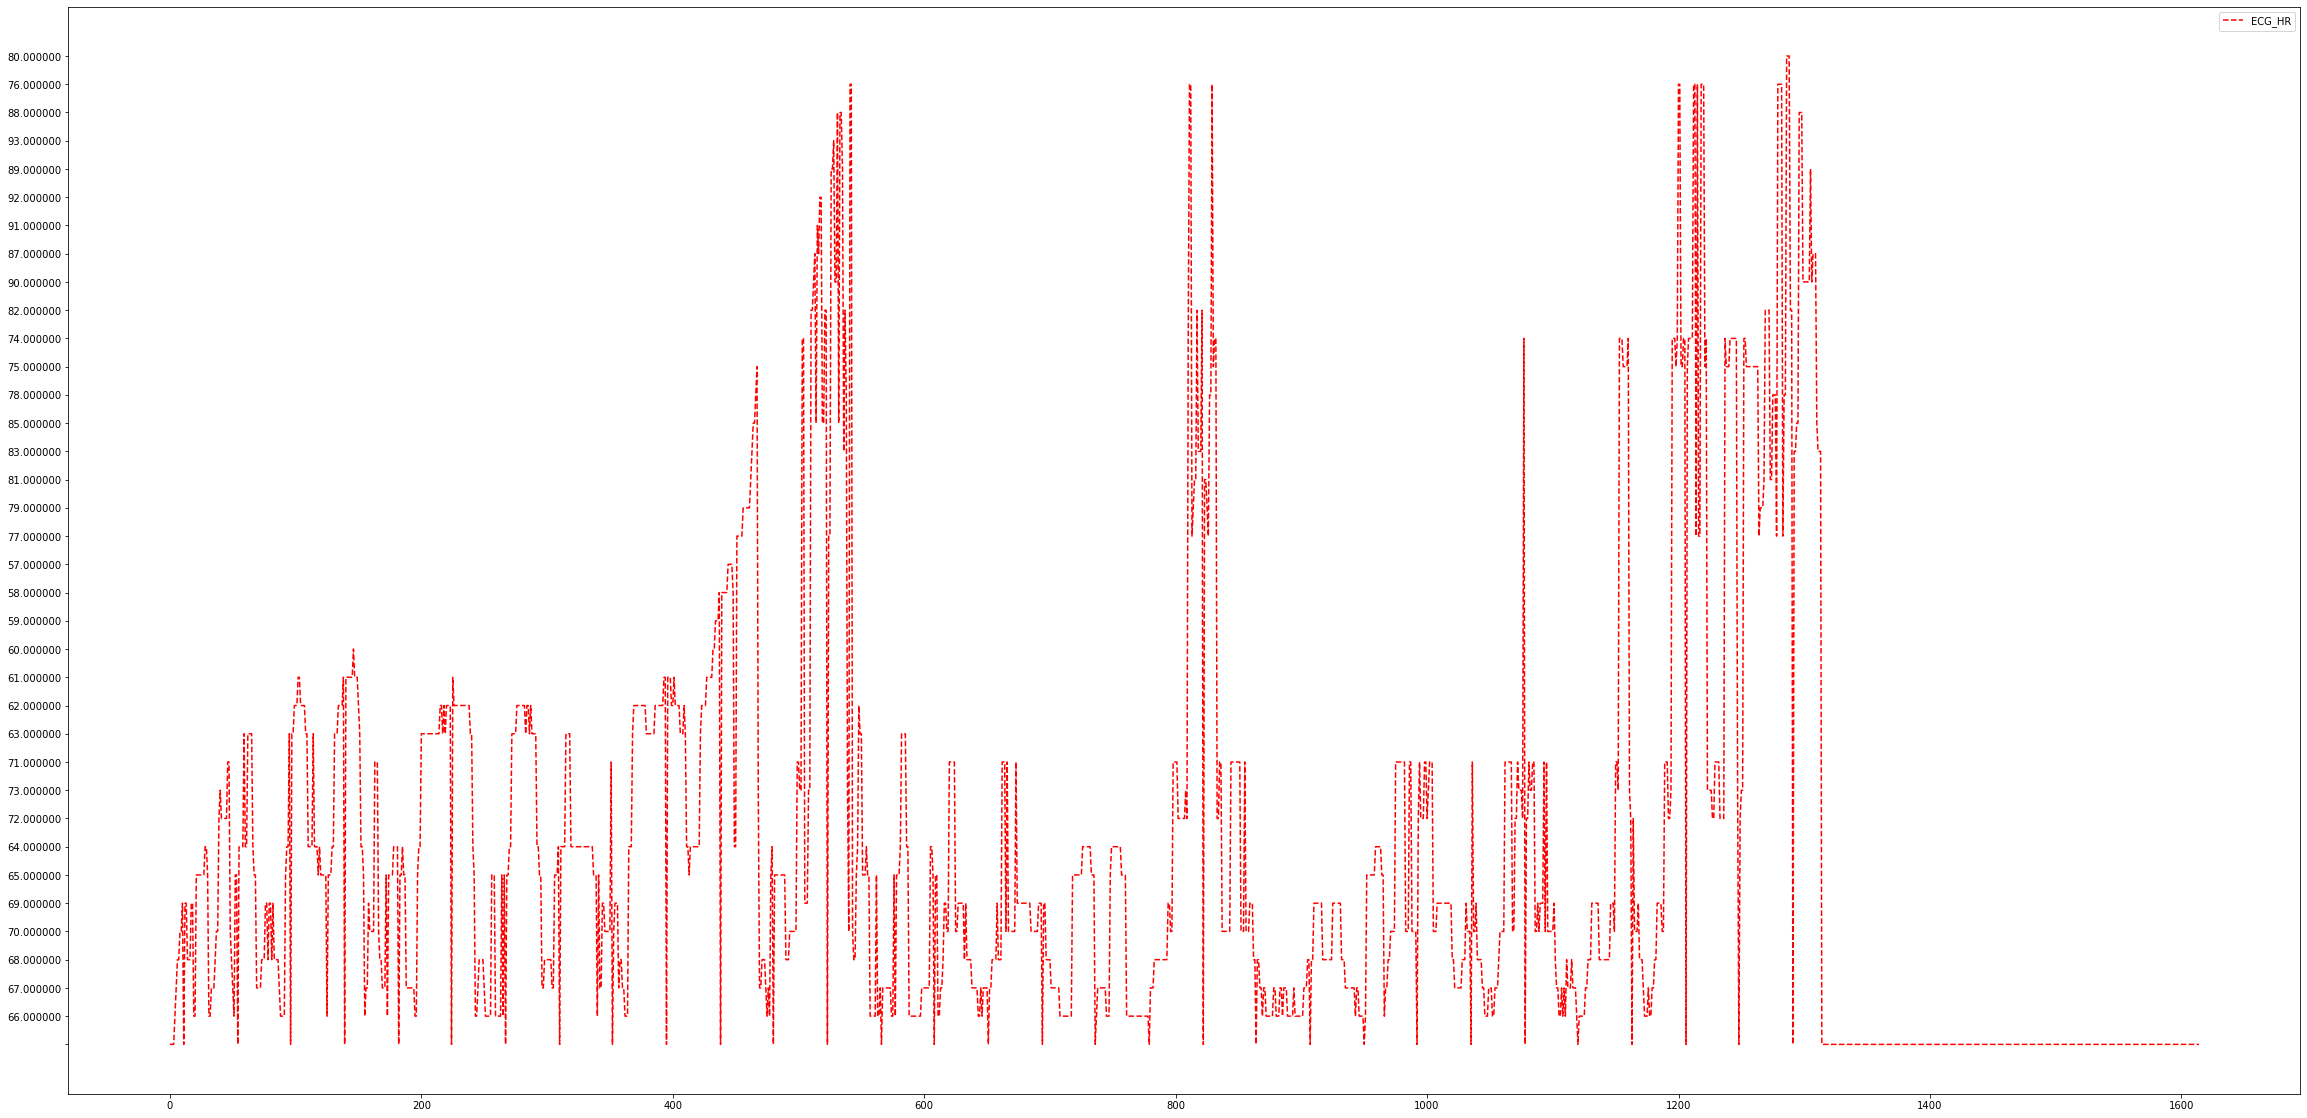

In [48]:
# df.head() 
# len(df['ECG_HR'])
plt.figure(figsize=(40, 20))
plt.plot(df['ECG_HR'], 'r--', label='ECG_HR')
# plt.plot(df.iloc[:, 6], label='PLENTH')
plt.legend() 
plt.show()
# plt.plot(df.iloc[:, 6])

In [49]:
# df.shape
# df.loc[:300, 'ECG_HR']
# sample_df = df.iloc[:, ['Time', 'ECG_HR']]
sample_df = df.iloc[2:1612, [0, 6]]

In [51]:
# type(sample_df)
# sample_df = sample_df.set_index('Time', inplace=True)
sample_df = sample_df.set_index(keys=['Time'], inplace=False, drop=True)
sample_df

,PLETH
Time,
2.000000,62.759464
3.000000,70.525032
4.000000,29.621490
5.000000,45.299145
6.000000,51.623932
...,...
1607.000000,50.012211
1608.000000,50.012211
1609.000000,50.012211


In [52]:
def kpss_test(timeseries): 
    print("Results of KPSS Test:") 
    kpsstest = kpss(timeseries, regression="c", nlags="auto") 
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"] ) 
    
    for key, value in kpsstest[3].items(): 
        kpss_output["Critical Value (%s)" % key] = value 
    print(kpss_output)
    
kpss_test(sample_df)

Results of KPSS Test:
Test Statistic            0.325392
p-value                   0.100000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [11]:
# sample_df.iloc[:10, 0]
values_sample_df = sample_df.values
values_sample_df

array([['2.000000', '62.759464'],
       ['3.000000', '70.525032'],
       ['4.000000', '29.621490'],
       ...,
       ['1609.000000', '50.012211'],
       ['1610.000000', '50.012211'],
       ['1611.000000', '50.012211']], dtype=object)

In [13]:
# sample_data = values_sample_df[5:1314]

fixed_sample_data = [] 
for idx, val in enumerate(values_sample_df):
    if val[1] == '':
        fixed_sample_data.append(values_sample_df[idx-1, :].astype(np.float32).tolist())
    else:
        fixed_sample_data.append(val.astype(np.float32).tolist())
        

In [14]:
# fixed_sample_data = fixed_sample_data.astype(np.float32)
# fixed_sample_data.tolist()
# sample_data[idx-1, :].astype(np.float32).tolist()
fixed_sample_data = np.array(fixed_sample_data)


In [15]:
fixed_sample_data

array([[   2.        ,   62.75946426],
       [   3.        ,   70.52503204],
       [   4.        ,   29.62149048],
       ...,
       [1609.        ,   50.01221085],
       [1610.        ,   50.01221085],
       [1611.        ,   50.01221085]])

In [16]:
def split_xy(dataset, timesteps, y_column):
    x, y = list(), list() 
    
    for i in range(len(dataset)):
        x_end_number = i + timesteps
        y_end_number = x_end_number + y_column
        
        if y_end_number > len(dataset):
            break 
        
        tmp_x = dataset[i:x_end_number, 0]
        tmp_y = dataset[x_end_number:y_end_number, 1]
        # print(tmp_y.shape)
        
        x.append(tmp_x)
        y.append(tmp_y)
        
    return np.array(x), np.array(y)
        
x, y = split_xy(fixed_sample_data, 10, 1)
x, y


(array([[   2.,    3.,    4., ...,    9.,   10.,   11.],
        [   3.,    4.,    5., ...,   10.,   11.,   12.],
        [   4.,    5.,    6., ...,   11.,   12.,   13.],
        ...,
        [1599., 1600., 1601., ..., 1606., 1607., 1608.],
        [1600., 1601., 1602., ..., 1607., 1608., 1609.],
        [1601., 1602., 1603., ..., 1608., 1609., 1610.]]),
 array([[50.03662872],
        [39.90232086],
        [49.98778915],
        ...,
        [50.01221085],
        [50.01221085],
        [50.01221085]]))

In [17]:
x.shape, y.shape
# len(y)
# y.shape


((1600, 10), (1600, 1))

In [18]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=1, test_size=0.3
)

In [19]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1120, 10), (1120, 1), (480, 10), (480, 1))

In [20]:
# x_train = np.reshape(x_train, ())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled, x_test_scaled

(array([[-1.45174572, -1.45174572, -1.45174572, ..., -1.45174572,
         -1.45174572, -1.45174572],
        [ 0.03446445,  0.03446445,  0.03446445, ...,  0.03446445,
          0.03446445,  0.03446445],
        [-0.34577938, -0.34577938, -0.34577938, ..., -0.34577938,
         -0.34577938, -0.34577938],
        ...,
        [ 0.65589151,  0.65589151,  0.65589151, ...,  0.65589151,
          0.65589151,  0.65589151],
        [-1.21490814, -1.21490814, -1.21490814, ..., -1.21490814,
         -1.21490814, -1.21490814],
        [ 0.57984274,  0.57984274,  0.57984274, ...,  0.57984274,
          0.57984274,  0.57984274]]),
 array([[-1.56255964, -1.56255964, -1.56255964, ..., -1.56255964,
         -1.56255964, -1.56255964],
        [ 1.06438202,  1.06438202,  1.06438202, ...,  1.06438202,
          1.06438202,  1.06438202],
        [-0.83900995, -0.83900995, -0.83900995, ..., -0.83900995,
         -0.83900995, -0.83900995],
        ...,
        [-0.26755779, -0.26755779, -0.26755779, ..., -

In [21]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(10, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [22]:
x_train_scaled.shape, y_train.shape

((1120, 10), (1120, 1))

In [23]:
# y_train = y_train.tolist()
y_train.shape

(1120, 1)

In [24]:
from keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

early_stopping = EarlyStopping(patience=20) 
model.fit(x_train_scaled, 
          y_train, 
          validation_split=0.2,
          verbose=1, 
          batch_size=1, 
          epochs=100, 
          callbacks=[early_stopping])

Epoch 1/100
896/896 [==============================] - 5s 3ms/step - loss: 484.0663 - mse: 484.0663 - val_loss: 181.7395 - val_mse: 181.7395
Epoch 2/100
896/896 [==============================] - 3s 3ms/step - loss: 222.9078 - mse: 222.9078 - val_loss: 173.3833 - val_mse: 173.3833
Epoch 3/100
896/896 [==============================] - 3s 4ms/step - loss: 222.0034 - mse: 222.0034 - val_loss: 192.4478 - val_mse: 192.4478
Epoch 4/100
896/896 [==============================] - 3s 4ms/step - loss: 225.0032 - mse: 225.0032 - val_loss: 219.5409 - val_mse: 219.5409
Epoch 5/100
896/896 [==============================] - 3s 4ms/step - loss: 218.9318 - mse: 218.9318 - val_loss: 191.2723 - val_mse: 191.2723
Epoch 6/100
896/896 [==============================] - 3s 4ms/step - loss: 219.5463 - mse: 219.5463 - val_loss: 191.8320 - val_mse: 191.8320
Epoch 7/100
896/896 [==============================] - 3s 4ms/step - loss: 218.1936 - mse: 218.1936 - val_loss: 187.7437 - val_mse: 187.7437
Epoch 8/100
8

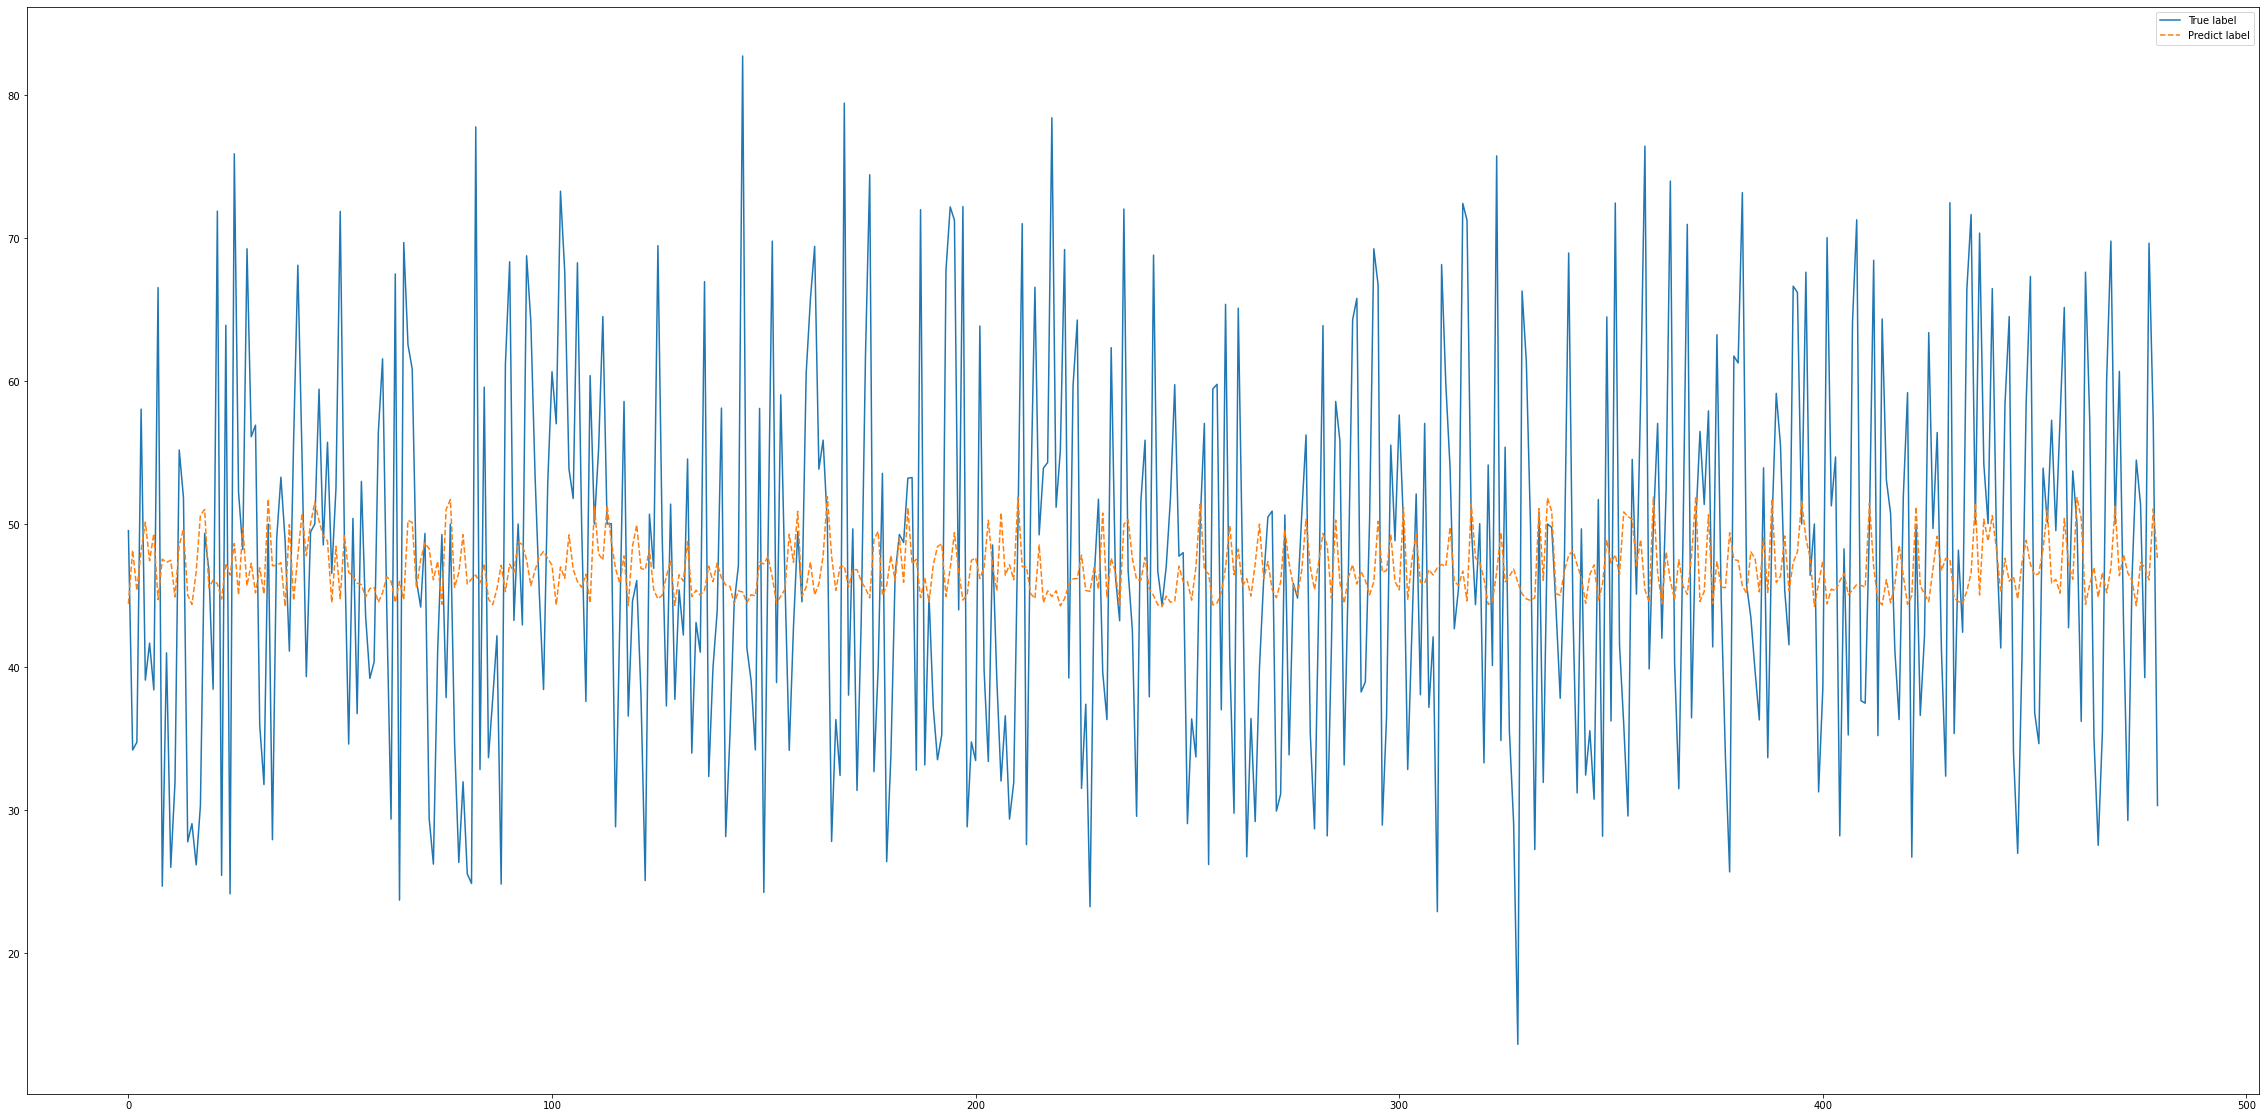

In [25]:
y_pred = model.predict(x_test_scaled)

# y_pred_values = [] 
# for i in range(5):
#     print()

plt.figure(figsize=(40, 20))
plt.plot(y_test, label='True label')
plt.plot(y_pred, '--', label='Predict label')
plt.legend()
plt.show()

In [29]:
x_train_scaled

array([[ 1.5671194 ,  1.5671194 ,  1.5671194 , ...,  1.5671194 ,
         1.5671194 ,  1.5671194 ],
       [ 1.02677481,  1.02677481,  1.02677481, ...,  1.02677481,
         1.02677481,  1.02677481],
       [ 0.2342694 ,  0.2342694 ,  0.2342694 , ...,  0.2342694 ,
         0.2342694 ,  0.2342694 ],
       ...,
       [-0.83441213, -0.83441213, -0.83441213, ..., -0.83441213,
        -0.83441213, -0.83441213],
       [ 1.12283607,  1.12283607,  1.12283607, ...,  1.12283607,
         1.12283607,  1.12283607],
       [-1.25468015, -1.25468015, -1.25468015, ..., -1.25468015,
        -1.25468015, -1.25468015]])

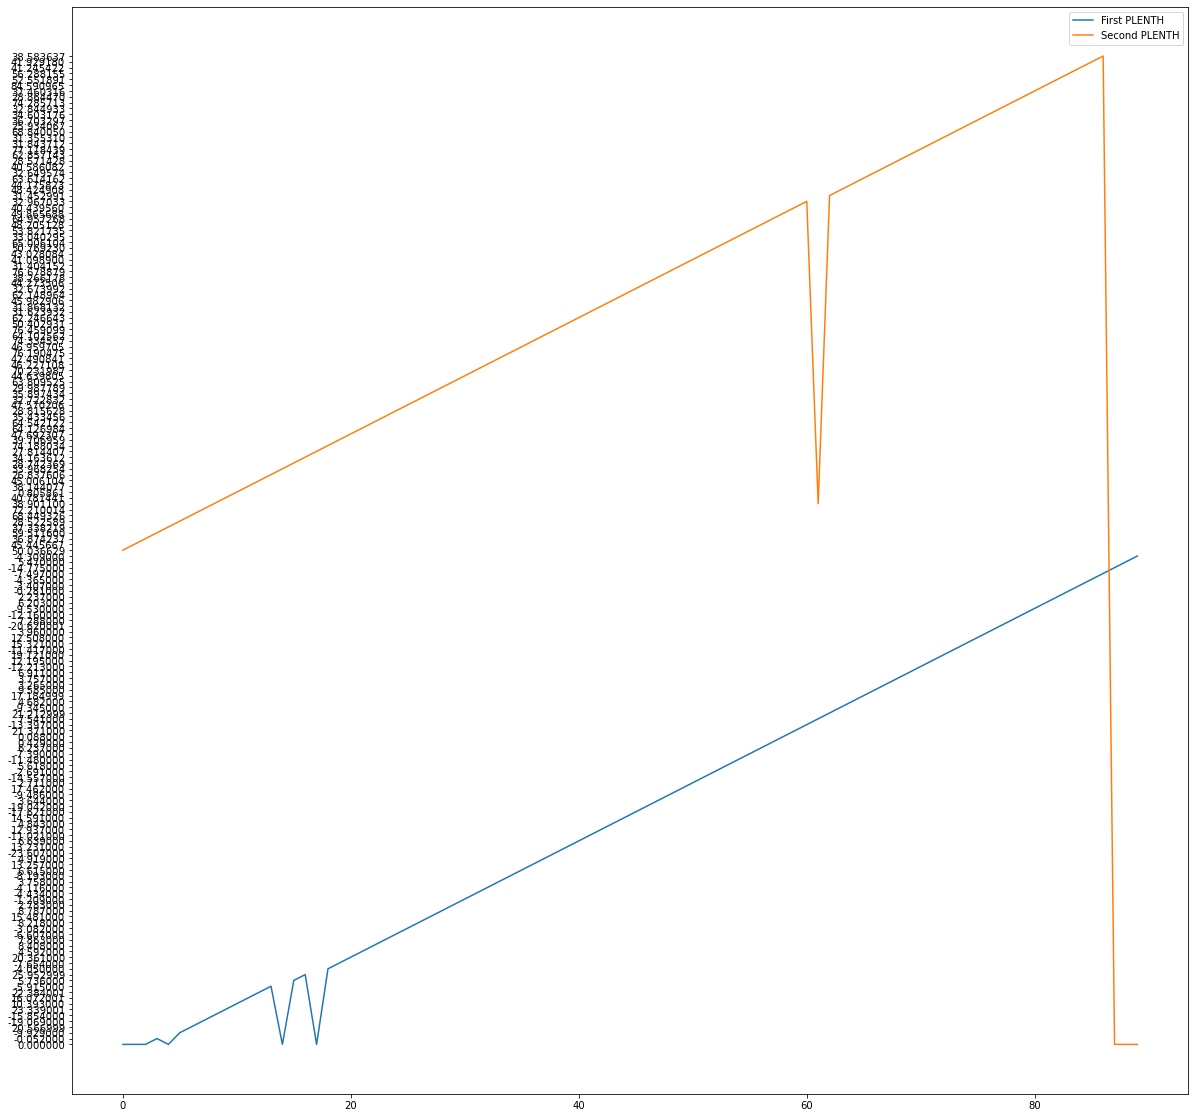

In [12]:
plt.figure(figsize=(20, 20))
plt.plot(df.iloc[:, 1], label='First PLENTH')
plt.plot(df.iloc[:, 3], label='Second PLENTH')
plt.legend()
plt.show()

<AxesSubplot:>

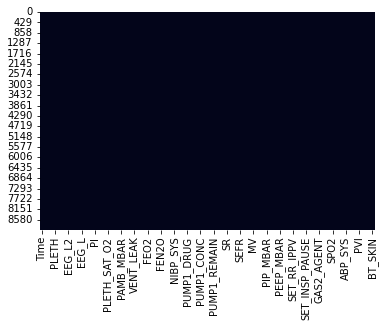

In [3]:
# df.isnull()
import seaborn as sns 

sns.heatmap(df.isnull(), cbar=False)

In [41]:
df[df['ECG_II'] == ''], df[df['CO2'] == '']

(             Time       PLETH ECG_II     PLETH        CO2      EEG_L1  \
 490    490.000000   -9.495000                    1.200000  -31.250000   
 4092  4092.000000  -10.176000                   36.099998   10.416667   
 7694  7694.000000   -7.336000                   31.500000  -14.583333   
 8700  8700.000000  -14.775000         0.000000   0.000000    2.083333   
 8701  8701.000000   32.768002         0.000000   0.000000    2.083333   
 ...           ...         ...    ...       ...        ...         ...   
 8984  8984.000000   -0.399000         0.000000   0.000000    2.083333   
 8985  8985.000000    1.347000         0.000000   0.000000    2.083333   
 8986  8986.000000    1.776000         0.000000               2.083333   
 8987  8987.000000    5.395000                                2.083333   
 8988  8988.000000    3.708000                                           
 
           EEG_L2      EEG_R1      EEG_R2       EEG_L  ...        SPO2  \
 490   -35.416668  -22.916666  -43.7

In [21]:
type(df.loc[0, 'Time'])

numpy.float64

In [24]:
df = df.fillna(0)

In [41]:
# pd.save_csv(df)
# df.save
df.to_csv('test.csv')

In [45]:
# rootdir = r"//Vitalnew/vital_data/Monthly_Confirmed/SNUH_OR"
rootdir = r'D:/first_filtered/'

for dir, dirs, files in os.walk(rootdir):
    
    for file in files[:10]:
        ipath = '{}/{}'.format(dir, file)
        cmd = 'vital_trks {}'.format(ipath)
        p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
        df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')

        devs = []
        for index, row in df.iterrows():
            if row['tname'] != 'SVV':
                continue

            devs.append(row['dname'])


        if not devs:
            continue
        
        if type(devs) == 'float':
            print(devs)
        # print(devs)
        # print('{},{}'.format(ipath[len(rootdir)+1:], ','.join(devs)))

In [18]:
# devs
df.describe()

,Time,PLETH,ECG_II,PLETH,CO2,EEG_L1,EEG_L2,EEG_R1,EEG_R2,EEG_L,...,SPO2,BPM,ABP,ABP_SYS,ABP_DIA,HR,PVI,SET_FLOW_TRIG,PPV,BT_SKIN
count,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989,...,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989
unique,8989,7608,336,2322,421,124,160,159,140,86,...,7,44,1142,57,47,64,31,2,21,197
top,0.000000,0.000000,-0.044999,0.000000,0.000000,2.083333,2.083333,2.083333,2.083333,0.000000,...,99.000000,,,,,,,,,
freq,1,612,350,270,745,1490,1192,1490,1190,1716,...,5517,1119,732,1410,1410,1435,1544,7128,2124,4302
